In [0]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
from pyspark.sql.types import DoubleType
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.ml.linalg import SparseVector
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np
import matplotlib.mlab as mlab
import seaborn as sbs
from matplotlib.ticker import MaxNLocator

In [0]:
# Read dataset from  /FileStore/tables/flight_weather.csv
# File location and type
file_location = "/FileStore/tables/Wales_data3.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

Year Quarter PoliceForce AccidentReference Time Time of the day Day Local Authority Code Easting Northing Latitude Longitude Roadtype Road Road2 SpeedLimit TrunkRoadStatus Pedestrians Total Vehicles Agricultural vehicles Buses_ coaches or minibuses Cars Light vans or goods vehicles Motorcycles Pedal cycles Ridden horses Taxis or private hire vehicles Trams or light rail vehicles Other vehicles Total Casualties TC Binary Fatal Serious Slight Age Of Casualty 0-15 Age Of Casualty 16-19 Age Of Casualty 20-24 Age Of Casualty 25-29 Age Of Casualty 30-39 Age Of Casualty 40-49 Age Of Casualty 50-59 Age Of Casualty 60-69 Age Of Casualty 70+ Age Of Casualty Unknown Motorcyle Fatal Motorcyle Serious Young Fatal Young Serious Older Drivers Young Drivers 2020 1 63 A000320 00:55 night Wednesday W06000010 262830 221570 51.87578185 -3.994022654 Single carriageway A483 null 30 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2020 1 60 Y001304 03:00 night Wednesday W06000004 300594 381453 53.32063829 -3.493776497 One Way Street U null 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2020 1 62 2000078 13:23 afternoon Wednesday W06000016 301977 201964 51.70782175 -3.420029 Single carriageway U U 30 0 0 3 0 0 3 0 0 0 0 0 0 0 2 0 0 0 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 2020 1 62 2000085 23:40 night Wednesday W06000016 308014 194154 51.63864298 -3.330625885 Single carriageway U null 20 0 0 1 0 0 1 0 0 0 0 0 0 0 3 1 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020 1 61 120 12:15 afternoon Thursday W06000022 335574 188248 51.5893855 -2.931355792 Single carriageway U null 30 0 0 3 0 0 3 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2020 1 62 2000108 16:31 afternoon Thursday W06000016 297548 198133 51.67259599 -3.482978578 Single carriageway A4233 null 30 0 0 4 0 0 4 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 2020 1 62 2000088 16:33 afternoon Thursday W06000015 315318 177058 51.48611028 -3.220983506 Roundabout U U 20 0 0 2 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2020 1 63 D000620 18:40 evening Thursday W06000023 299640 215570 51.8297008 -3.457775014 Single carriageway A47 null 60 0 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 2020 1 61 420 20:05 evening Thursday W06000021 330358 210312 51.78711433 -3.011044857 Single carriageway A4042 null 60 1 0 2 0 0 2 0 0 0 0 0 0 0 4 1 1 3 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 2020 1 63 C000720 23:21 night Thursday W06000009 210460 205860 51.71935247 -4.745377414 Single carriageway U null 60 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 2020 1 62 2000080 09:58 morning Friday W06000015 322739 178483 51.49998479 -3.114441324 Single carriageway B4239 U 30 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2020 1 61 1820 10:00 morning Friday W06000022 330839 189287 51.59816377 -2.999897709 Single carriageway A4051 null 30 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2020 1 63 A001220 11:55 morning Friday W06000010 252080 243420 52.06934103 -4.1594906 Single carriageway A485 null 30 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 2020 1 60 Y001159 13:20 afternoon Friday W06000002 232114 331086 52.85102831 -4.494649844 Single carriageway A499 U 60 0 0 2 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2020 1 62 2000079 15:25 afternoon Friday W06000024 304697 206477 51.74885599 -3.381913378 Single carriageway A4054 A4102 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2020 1 61 1420 17:00 evening Friday W06000022 331345 188445 51.59065623 -2.992428556 Single carriageway A4596 U 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2020 1 63 C001020 17:11 evening Friday W06000009 205720 205280 51.71252141 -4.813586909 Single carriageway A4075 U 60 0 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2020 1 60 Y001269 17:24 evening Friday W06000001 252536 371657 53.22143926 -4.21019952

In [0]:
#Total rows of dataframe
print("The dataset has %d rows." % df.count())

The dataset has 2864 rows.

In [0]:
#selecting the needed columns
df= df.select(
  "Time of the day","Day","Roadtype","SpeedLimit","TrunkRoadStatus","Pedestrians","Total Vehicles","Agricultural vehicles","Buses_ coaches or minibuses","Cars",
    "Light vans or goods vehicles","Motorcycles","Pedal cycles","Ridden horses","Taxis or private hire vehicles","Trams or light rail vehicles","Other vehicles",	
    "Total Casualties",	"Fatal","Serious","Slight",	"Age Of Casualty 0-15",	"Age Of Casualty 16-19","Age Of Casualty 20-24","Age Of Casualty 25-29","Age Of Casualty 30-39",	"Age Of Casualty 40-49","Age Of Casualty 50-59","Age Of Casualty 60-69","Age Of Casualty 70+","Age Of Casualty Unknown","Motorcyle Fatal",	"Motorcyle Serious",	
    "Young Fatal","Young Serious","Older Drivers","Young Drivers","TC Binary")

display(df)

Time of the day Day Roadtype SpeedLimit TrunkRoadStatus Pedestrians Total Vehicles Agricultural vehicles Buses_ coaches or minibuses Cars Light vans or goods vehicles Motorcycles Pedal cycles Ridden horses Taxis or private hire vehicles Trams or light rail vehicles Other vehicles Total Casualties Fatal Serious Slight Age Of Casualty 0-15 Age Of Casualty 16-19 Age Of Casualty 20-24 Age Of Casualty 25-29 Age Of Casualty 30-39 Age Of Casualty 40-49 Age Of Casualty 50-59 Age Of Casualty 60-69 Age Of Casualty 70+ Age Of Casualty Unknown Motorcyle Fatal Motorcyle Serious Young Fatal Young Serious Older Drivers Young Drivers TC Binary night Wednesday Single carriageway 30 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 night Wednesday One Way Street 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 afternoon Wednesday Single carriageway 30 0 0 3 0 0 3 0 0 0 0 0 0 0 2 0 0 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 night Wednesday Single carriageway 20 0 0 1 0 0 1 0 0 0 0 0 0 0 3 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 afternoon Thursday Single carriageway 30 0 0 3 0 0 3 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 afternoon Thursday Single carriageway 30 0 0 4 0 0 4 0 0 0 0 0 0 0 2 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 afternoon Thursday Roundabout 20 0 0 2 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 evening Thursday Single carriageway 60 0 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 evening Thursday Single carriageway 60 1 0 2 0 0 2 0 0 0 0 0 0 0 4 1 3 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 night Thursday Single carriageway 60 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 morning Friday Single carriageway 30 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 morning Friday Single carriageway 30 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 morning Friday Single carriageway 30 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 afternoon Friday Single carriageway 60 0 0 2 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 afternoon Friday Single carriageway 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 evening Friday Single carriageway 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 evening Friday Single carriageway 60 0 0 2 0 0 2 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 evening Friday Single carriageway 30 0 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 morning Saturday Single carriageway 30 0 0 2 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 morning Saturday Single carriageway 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 afternoon Saturday Dual carriageway 50 0 0 2 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 afternoon Saturday Single carriageway 30 0 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 afternoon Saturday Single carriageway 30 0 0 3 0 1 2 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 evening Saturday Single carriageway 20 0 0 4 0 0 3 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 evening Saturday Single carriageway 50 1 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 evening Saturday Single carriageway 60 0 0 1 0 0 1 0 0 0 0 0 0 0 3 0 3 0 2 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 night Sunday Single carriageway 60 0 0 1 0 0 1 0 0 0 0 0 0 0 3 1 2 0 0 0 2 0 1 0 0 0 0 0 0 0 1 1 0 1 1 morning Sunday Single carriageway 30 0 0 4 0 0 3 1 0 0 0 0 0 0 2 0 0 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 morning Sunday Single carriageway 30 0 0 2 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 afternoon Sunday Single carriageway 30 0 0 2 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 afternoon Sunday Dual carriageway 70 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 morning Monday Single carriageway 60 0 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 

In [0]:
# Drop rows with null values
df = df.dropna()
display(df)

Time of the day Day Roadtype SpeedLimit TrunkRoadStatus Pedestrians Total Vehicles Agricultural vehicles Buses_ coaches or minibuses Cars Light vans or goods vehicles Motorcycles Pedal cycles Ridden horses Taxis or private hire vehicles Trams or light rail vehicles Other vehicles Total Casualties Fatal Serious Slight Age Of Casualty 0-15 Age Of Casualty 16-19 Age Of Casualty 20-24 Age Of Casualty 25-29 Age Of Casualty 30-39 Age Of Casualty 40-49 Age Of Casualty 50-59 Age Of Casualty 60-69 Age Of Casualty 70+ Age Of Casualty Unknown Motorcyle Fatal Motorcyle Serious Young Fatal Young Serious Older Drivers Young Drivers TC Binary night Wednesday Single carriageway 30 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 night Wednesday One Way Street 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 afternoon Wednesday Single carriageway 30 0 0 3 0 0 3 0 0 0 0 0 0 0 2 0 0 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 night Wednesday Single carriageway 20 0 0 1 0 0 1 0 0 0 0 0 0 0 3 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 afternoon Thursday Single carriageway 30 0 0 3 0 0 3 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 afternoon Thursday Single carriageway 30 0 0 4 0 0 4 0 0 0 0 0 0 0 2 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 afternoon Thursday Roundabout 20 0 0 2 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 evening Thursday Single carriageway 60 0 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 evening Thursday Single carriageway 60 1 0 2 0 0 2 0 0 0 0 0 0 0 4 1 3 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 night Thursday Single carriageway 60 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 morning Friday Single carriageway 30 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 morning Friday Single carriageway 30 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 morning Friday Single carriageway 30 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 afternoon Friday Single carriageway 60 0 0 2 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 afternoon Friday Single carriageway 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 evening Friday Single carriageway 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 evening Friday Single carriageway 60 0 0 2 0 0 2 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 evening Friday Single carriageway 30 0 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 morning Saturday Single carriageway 30 0 0 2 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 morning Saturday Single carriageway 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 afternoon Saturday Dual carriageway 50 0 0 2 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 afternoon Saturday Single carriageway 30 0 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 afternoon Saturday Single carriageway 30 0 0 3 0 1 2 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 evening Saturday Single carriageway 20 0 0 4 0 0 3 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 evening Saturday Single carriageway 50 1 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 evening Saturday Single carriageway 60 0 0 1 0 0 1 0 0 0 0 0 0 0 3 0 3 0 2 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 night Sunday Single carriageway 60 0 0 1 0 0 1 0 0 0 0 0 0 0 3 1 2 0 0 0 2 0 1 0 0 0 0 0 0 0 1 1 0 1 1 morning Sunday Single carriageway 30 0 0 4 0 0 3 1 0 0 0 0 0 0 2 0 0 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 morning Sunday Single carriageway 30 0 0 2 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 afternoon Sunday Single carriageway 30 0 0 2 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 afternoon Sunday Dual carriageway 70 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 morning Monday Single carriageway 60 0 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 

In [0]:
#checking the scehma of the data
df.printSchema()

root
-- Time of the day: string (nullable = true)
-- Day: string (nullable = true)
-- Roadtype: string (nullable = true)
-- SpeedLimit: string (nullable = true)
-- TrunkRoadStatus: string (nullable = true)
-- Pedestrians: string (nullable = true)
-- Total Vehicles: string (nullable = true)
-- Agricultural vehicles: string (nullable = true)
-- Buses_ coaches or minibuses: string (nullable = true)
-- Cars: string (nullable = true)
-- Light vans or goods vehicles: string (nullable = true)
-- Motorcycles: string (nullable = true)
-- Pedal cycles: string (nullable = true)
-- Ridden horses: string (nullable = true)
-- Taxis or private hire vehicles: string (nullable = true)
-- Trams or light rail vehicles: string (nullable = true)
-- Other vehicles: string (nullable = true)
-- Total Casualties: string (nullable = true)
-- Fatal: string (nullable = true)
-- Serious: string (nullable = true)
-- Slight: string (nullable = true)
-- Age Of Casualty 0-15: string (nullable = true)
-- Age Of Casualty 16-19: string (nullable = true)
-- Age Of Casualty 20-24: string (nullable = true)
-- Age Of Casualty 25-29: string (nullable = true)
-- Age Of Casualty 30-39: string (nullable = true)
-- Age Of Casualty 40-49: string (nullable = true)
-- Age Of Casualty 50-59: string (nullable = true)
-- Age Of Casualty 60-69: string (nullable = true)
-- Age Of Casualty 70+: string (nullable = true)
-- Age Of Casualty Unknown: string (nullable = true)
-- Motorcyle Fatal: string (nullable = true)
-- Motorcyle Serious: string (nullable = true)
-- Young Fatal: string (nullable = true)
-- Young Serious: string (nullable = true)
-- Older Drivers: string (nullable = true)
-- Young Drivers: string (nullable = true)
-- TC Binary: string (nullable = true)

In [0]:
#convert datatype to needed
from pyspark.sql.types import IntegerType
from pyspark.sql.types import DoubleType
df = df.withColumn("SpeedLimit", df["SpeedLimit"].cast(IntegerType()))
df = df.withColumn("TrunkRoadStatus", df["TrunkRoadStatus"].cast(IntegerType()))
df = df.withColumn("Pedestrians", df["Pedestrians"].cast(IntegerType()))
df = df.withColumn("Total Vehicles", df["Total Vehicles"].cast(IntegerType()))
df = df.withColumn("Agricultural vehicles", df["Agricultural vehicles"].cast(IntegerType()))
df = df.withColumn("Buses_ coaches or minibuses", df["Buses_ coaches or minibuses"].cast(IntegerType()))
df = df.withColumn("Cars", df["Cars"].cast(IntegerType()))
df = df.withColumn("Light vans or goods vehicles", df["Light vans or goods vehicles"].cast(IntegerType()))
df = df.withColumn("Motorcycles", df["Motorcycles"].cast(IntegerType()))
df = df.withColumn("Pedal cycles", df["Pedal cycles"].cast(IntegerType()))
df = df.withColumn("Ridden horses", df["Ridden horses"].cast(IntegerType()))
df = df.withColumn("Taxis or private hire vehicles", df["Taxis or private hire vehicles"].cast(IntegerType()))
df = df.withColumn("Trams or light rail vehicles", df["Trams or light rail vehicles"].cast(IntegerType()))
df = df.withColumn("Other vehicles", df["Other vehicles"].cast(IntegerType()))
df = df.withColumn("Total Casualties", df["Total Casualties"].cast(DoubleType()))
df = df.withColumn("Fatal", df["Fatal"].cast(IntegerType()))
df = df.withColumn("Serious", df["Serious"].cast(IntegerType()))
df = df.withColumn("Slight", df["Slight"].cast(IntegerType()))
df = df.withColumn("Age Of Casualty 0-15", df["Age Of Casualty 0-15"].cast(IntegerType()))
df = df.withColumn("Age Of Casualty 16-19", df["Age Of Casualty 16-19"].cast(IntegerType()))
df = df.withColumn("Age Of Casualty 20-24", df["Age Of Casualty 20-24"].cast(IntegerType()))
df = df.withColumn("Age Of Casualty 25-29", df["Age Of Casualty 25-29"].cast(IntegerType()))
df = df.withColumn("Age Of Casualty 30-39", df["Age Of Casualty 30-39"].cast(IntegerType()))
df = df.withColumn("Age Of Casualty 40-49", df["Age Of Casualty 40-49"].cast(IntegerType()))
df = df.withColumn("Age Of Casualty 50-59", df["Age Of Casualty 50-59"].cast(IntegerType()))
df = df.withColumn("Age Of Casualty 60-69", df["Age Of Casualty 60-69"].cast(IntegerType()))
df = df.withColumn("Age Of Casualty 70+", df["Age Of Casualty 70+"].cast(IntegerType()))
df = df.withColumn("Age Of Casualty Unknown", df["Age Of Casualty Unknown"].cast(IntegerType()))
df = df.withColumn("Motorcyle Fatal", df["Motorcyle Fatal"].cast(IntegerType()))
df = df.withColumn("Motorcyle Serious", df["Motorcyle Serious"].cast(IntegerType()))
df = df.withColumn("Young Fatal", df["Young Fatal"].cast(IntegerType()))
df = df.withColumn("Young Serious", df["Young Serious"].cast(IntegerType()))
df = df.withColumn("Older Drivers", df["Older Drivers"].cast(IntegerType()))
df = df.withColumn("Young Drivers", df["Young Drivers"].cast(IntegerType()))
df = df.withColumn("TC Binary", df["TC Binary"].cast(IntegerType()))

In [0]:
#grouping the Total Casualties based on time of the day
df.groupBy('Time of the Day').count().show()

+---------------+-----+
Time of the Day|count|
+---------------+-----+
 afternoon| 1074|
 night| 232|
 morning| 753|
 evening| 787|
+---------------+-----+

In [0]:
#graphical representation 
display(df.select("Time of the day", "Total Casualties"))

Time of the day Total Casualties night 1.0 night 1.0 afternoon 2.0 night 3.0 afternoon 1.0 afternoon 2.0 afternoon 1.0 evening 1.0 evening 4.0 night 1.0 morning 2.0 morning 1.0 morning 1.0 afternoon 1.0 afternoon 1.0 evening 1.0 evening 1.0 evening 1.0 morning 1.0 morning 1.0 afternoon 1.0 afternoon 1.0 afternoon 2.0 evening 1.0 evening 1.0 evening 3.0 night 3.0 morning 2.0 morning 1.0 afternoon 1.0 afternoon 1.0 morning 1.0 morning 1.0 evening 2.0 night 2.0 morning 1.0 morning 1.0 morning 1.0 morning 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 evening 1.0 evening 2.0 evening 2.0 evening 1.0 evening 2.0 night 1.0 morning 1.0 morning 1.0 morning 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 night 1.0 morning 1.0 morning 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 evening 1.0 evening 1.0 morning 1.0 morning 1.0 morning 1.0 morning 2.0 morning 1.0 afternoon 1.0 afternoon 2.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 evening 1.0 evening 1.0 evening 1.0 evening 1.0 night 2.0 night 1.0 morning 1.0 morning 1.0 morning 2.0 afternoon 3.0 afternoon 1.0 evening 1.0 night 1.0 morning 1.0 afternoon 2.0 afternoon 1.0 afternoon 1.0 afternoon 2.0 evening 1.0 morning 1.0 morning 1.0 morning 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 afternoon 2.0 afternoon 1.0 evening 1.0 evening 1.0 evening 1.0 morning 1.0 morning 1.0 morning 1.0 morning 1.0 afternoon 1.0 afternoon 3.0 afternoon 1.0 evening 1.0 evening 1.0 evening 1.0 evening 2.0 evening 1.0 evening 1.0 evening 1.0 evening 1.0 evening 1.0 night 3.0 night 2.0 night 1.0 morning 1.0 morning 1.0 morning 1.0 morning 1.0 morning 1.0 morning 1.0 morning 2.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 evening 1.0 evening 1.0 evening 1.0 evening 1.0 night 4.0 morning 2.0 morning 2.0 morning 1.0 morning 1.0 morning 1.0 morning 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 morning 1.0 morning 1.0 morning 1.0 morning 1.0 morning 1.0 morning 1.0 morning 1.0 morning 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 evening 1.0 evening 1.0 evening 1.0 evening 1.0 evening 1.0 night 1.0 night 1.0 morning 1.0 morning 1.0 morning 2.0 afternoon 1.0 afternoon 2.0 afternoon 1.0 afternoon 1.0 evening 1.0 evening 1.0 evening 1.0 night 1.0 morning 1.0 morning 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 evening 1.0 morning 1.0 morning 1.0 morning 2.0 afternoon 1.0 afternoon 1.0 evening 1.0 evening 1.0 evening 1.0 morning 1.0 morning 1.0 morning 1.0 morning 1.0 morning 2.0 morning 1.0 afternoon 2.0 evening 1.0 evening 1.0 evening 1.0 evening 2.0 evening 1.0 morning 1.0 morning 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 evening 2.0 evening 2.0 evening 1.0 evening 1.0 evening 1.0 morning 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 evening 1.0 evening 1.0 evening 1.0 evening 1.0 evening 2.0 night 2.0 night 1.0 morning 1.0 morning 2.0 morning 1.0 morning 1.0 afternoon 2.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 afternoon 2.0 evening 1.0 evening 1.0 night 4.0 night 2.0 morning 1.0 morning 1.0 morning 2.0 afternoon 2.0 afternoon 1.0 evening 1.0 evening 1.0 evening 1.0 evening 1.0 evening 2.0 night 1.0 morning 1.0 afternoon 1.0 afternoon 1.0 evening 1.0 evening 2.0 evening 2.0 evening 2.0 morning 1.0 morning 2.0 afternoon 2.0 afternoon 1.0 evening 1.0 evening 1.0 evening 1.0 evening 1.0 evening 1.0 evening 1.0 evening 2.0 evening 3.0 night 2.0 morning 1.0 afternoon 2.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 evening 2.0 evening 1.0 evening 2.0 night 1.0 night 1.0 morning 1.0 morning 1.0 afternoon 1.0 afternoon 4.0 afternoon 1.0 morning 1.0 morning 1.0 morning 1.0 morning 1.0 morning 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 afternoon 1.0 afternoon 2.0 evening 1.0 evening 1.0 evening 2.0 evening 1.0 night 1.0 morning 3.0 morning 1.0 morning 1.0 morning 1.0 afternoon 1.0 afternoon 2.0 afternoon 3.0 afternoon 1.0 evening 1.0 evening 1.0 evening 2.0 evening 1.0 evening 1.0 evening 1.0 eveni

In [0]:
display(df.select("Time of the day", "Fatal"))

Time of the day Fatal night 0 night 0 afternoon 0 night 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 1 night 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 night 1 morning 0 morning 0 afternoon 0 afternoon 0 morning 0 morning 0 evening 0 night 0 morning 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 evening 0 evening 0 night 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 night 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 morning 0 morning 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 evening 0 night 0 night 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 evening 0 night 1 morning 0 afternoon 0 afternoon 0 afternoon 1 afternoon 0 evening 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 1 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 morning 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 evening 0 evening 0 evening 0 evening 0 evening 0 evening 0 night 0 night 0 night 0 morning 0 morning 0 morning 0 morning 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 evening 0 night 0 morning 1 morning 0 morning 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 morning 0 morning 0 morning 0 morning 0 morning 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 evening 1 evening 0 evening 0 evening 0 evening 0 night 0 night 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 night 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 evening 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 morning 0 morning 0 morning 0 morning 0 morning 0 morning 0 afternoon 0 evening 0 evening 0 evening 0 evening 0 evening 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 evening 0 evening 0 morning 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 evening 0 evening 1 night 0 night 0 morning 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 night 0 night 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 evening 0 evening 0 night 0 morning 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 evening 0 morning 0 morning 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 evening 0 evening 0 evening 0 evening 0 evening 0 night 0 morning 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 night 0 night 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 morning 0 morning 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 evening 0 night 0 morning 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 evening 0 evening 0 evening 0 evening 0 night 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 night 0 night 0 night 0 night 0 night 1 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 morning 1 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 evening 0 morning 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 morning 0 morning 0 morning 0 morning 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 evening 0 evening 0 evening 0 evening 0 morning 0 morning 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 afternoon 0 evening 0 night 0 morning 0 morning 0 aftern

In [0]:
#grouping the Total Casualties based on Day
df.groupBy('Day').count().show()

+---------+-----+
 Day|count|
+---------+-----+
Wednesday| 383|
 Tuesday| 409|
 Friday| 482|
 Thursday| 417|
 Saturday| 384|
 Monday| 405|
 Sunday| 366|
+---------+-----+

In [0]:
#graphical representation
display(df.select("Day", "Total Casualties"))

Day Total Casualties Wednesday 1.0 Wednesday 1.0 Wednesday 2.0 Wednesday 3.0 Thursday 1.0 Thursday 2.0 Thursday 1.0 Thursday 1.0 Thursday 4.0 Thursday 1.0 Friday 2.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Saturday 1.0 Saturday 1.0 Saturday 1.0 Saturday 1.0 Saturday 2.0 Saturday 1.0 Saturday 1.0 Saturday 3.0 Sunday 3.0 Sunday 2.0 Sunday 1.0 Sunday 1.0 Sunday 1.0 Monday 1.0 Monday 1.0 Monday 2.0 Monday 2.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 2.0 Tuesday 2.0 Tuesday 1.0 Tuesday 2.0 Tuesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 2.0 Friday 1.0 Friday 1.0 Friday 2.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 2.0 Friday 1.0 Saturday 1.0 Saturday 1.0 Saturday 2.0 Saturday 3.0 Saturday 1.0 Saturday 1.0 Sunday 1.0 Sunday 1.0 Sunday 2.0 Sunday 1.0 Sunday 1.0 Sunday 2.0 Sunday 1.0 Monday 1.0 Monday 1.0 Monday 1.0 Monday 1.0 Monday 1.0 Monday 1.0 Monday 2.0 Monday 1.0 Monday 1.0 Monday 1.0 Monday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 3.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 2.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 3.0 Tuesday 2.0 Tuesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 2.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 4.0 Thursday 2.0 Thursday 2.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Saturday 1.0 Saturday 1.0 Saturday 1.0 Saturday 2.0 Saturday 1.0 Saturday 2.0 Saturday 1.0 Saturday 1.0 Saturday 1.0 Saturday 1.0 Saturday 1.0 Saturday 1.0 Sunday 1.0 Sunday 1.0 Sunday 1.0 Sunday 1.0 Sunday 1.0 Sunday 1.0 Sunday 1.0 Monday 1.0 Monday 1.0 Monday 2.0 Monday 1.0 Monday 1.0 Monday 1.0 Monday 1.0 Monday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 2.0 Tuesday 1.0 Tuesday 2.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 2.0 Tuesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 2.0 Wednesday 2.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 2.0 Friday 2.0 Friday 1.0 Friday 1.0 Friday 2.0 Friday 1.0 Friday 1.0 Friday 2.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 2.0 Friday 1.0 Friday 1.0 Friday 4.0 Saturday 2.0 Saturday 1.0 Saturday 1.0 Saturday 2.0 Saturday 2.0 Saturday 1.0 Saturday 1.0 Saturday 1.0 Saturday 1.0 Saturday 1.0 Saturday 2.0 Saturday 1.0 Sunday 1.0 Sunday 1.0 Sunday 1.0 Sunday 1.0 Sunday 2.0 Sunday 2.0 Sunday 2.0 Monday 1.0 Monday 2.0 Monday 2.0 Monday 1.0 Monday 1.0 Monday 1.0 Monday 1.0 Monday 1.0 Monday 1.0 Monday 1.0 Monday 2.0 Monday 3.0 Monday 2.0 Tuesday 1.0 Tuesday 2.0 Tuesday 1.0 Tuesday 1.0 Tuesday 1.0 Tuesday 2.0 Tuesday 1.0 Tuesday 2.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 1.0 Wednesday 4.0 Wednesday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 1.0 Thursday 2.0 Thursday 1.0 Thursday 1.0 Thursday 2.0 Thursday 1.0 Friday 1.0 Friday 3.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 2.0 Friday 3.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 2.0 Friday 1.0 Friday 1.0 Friday 1.0 Friday 2.0 Friday 3.0 Saturday 1.0 Saturday 1.0 Saturday 1.0 Saturday 1.0 Saturday 2.0 Saturday 1.0 Saturday 1.0 Saturday 1

In [0]:
display(df.select("SpeedLimit", "Fatal"))

SpeedLimit Fatal 30 0 30 0 30 0 20 0 30 0 30 0 20 0 60 0 60 1 60 0 30 0 30 0 30 0 60 0 30 0 30 0 60 0 30 0 30 0 30 0 50 0 30 0 30 0 20 0 50 0 60 0 60 1 30 0 30 0 30 0 70 0 60 0 50 0 60 0 40 0 70 0 70 0 20 0 30 0 40 0 30 0 70 0 30 0 50 0 30 0 30 0 60 0 40 0 30 0 20 0 30 0 30 0 50 0 60 0 70 0 30 0 40 0 60 0 30 0 30 0 30 0 30 0 30 0 60 0 30 0 30 0 60 0 30 0 40 0 40 0 30 0 30 0 30 0 30 0 30 0 30 0 30 0 30 0 30 0 60 0 60 0 30 0 40 0 30 0 70 1 60 0 70 0 50 0 60 1 60 0 20 0 70 0 30 0 30 0 30 0 60 0 40 1 40 0 70 0 30 0 30 0 60 0 30 0 40 0 60 0 30 0 50 0 30 0 30 0 30 0 30 0 40 0 50 0 30 0 30 0 20 0 60 0 60 0 60 0 50 0 30 0 30 0 30 0 60 0 30 0 60 0 30 0 60 0 20 0 30 0 60 0 30 0 30 0 60 0 30 0 30 0 30 0 30 0 70 1 40 0 30 0 70 0 30 0 40 0 30 0 30 0 40 0 60 0 70 0 30 0 30 0 30 0 40 0 30 0 30 0 40 0 60 0 30 0 20 0 30 0 30 0 30 0 30 1 60 0 50 0 30 0 30 0 40 0 30 0 30 0 30 0 30 0 30 0 60 0 30 0 30 0 30 0 30 0 30 0 30 0 30 0 60 0 30 0 30 0 40 0 30 0 30 0 30 0 30 0 70 0 30 0 30 0 60 0 30 0 30 0 30 0 30 0 30 0 40 0 70 0 60 0 30 0 30 0 30 0 40 0 60 0 30 0 30 0 30 0 60 0 30 0 30 0 60 0 20 0 60 0 30 0 30 0 30 0 40 0 40 0 40 0 30 0 30 0 30 0 60 0 60 0 60 0 60 1 30 0 60 0 40 0 60 0 30 0 60 0 60 0 30 0 30 0 30 0 30 0 30 0 30 0 50 0 40 0 50 0 30 0 70 0 30 0 30 0 30 0 30 0 60 0 30 0 60 0 70 0 70 0 30 0 30 0 70 0 30 0 40 0 30 0 30 0 70 0 30 0 20 0 30 0 60 0 70 0 30 0 60 0 30 0 70 0 70 0 60 0 30 0 60 0 50 0 40 0 40 0 60 0 30 0 30 0 60 0 30 0 30 0 30 0 60 0 30 0 30 0 30 0 30 0 30 0 60 0 30 0 30 0 30 0 30 0 40 0 50 0 60 0 30 0 60 0 60 0 70 0 30 0 50 0 50 0 60 0 30 0 30 0 30 0 60 0 30 0 30 0 30 0 60 0 30 0 30 0 70 0 40 0 30 0 30 0 30 0 30 0 30 0 30 0 60 0 30 0 30 0 30 0 60 0 30 1 70 0 30 0 60 0 30 0 60 0 30 0 50 1 60 0 30 0 40 0 30 0 30 0 30 0 30 0 30 0 30 0 60 0 60 0 60 0 30 0 30 0 30 0 60 0 70 0 50 0 30 0 30 0 20 0 30 0 40 0 60 0 30 0 70 0 30 0 60 0 30 0 30 0 60 0 30 0 30 0 30 0 30 0 30 0 30 0 30 0 60 0 40 0 50 0 60 0 60 0 30 0 70 0 30 0 30 0 60 1 60 0 30 0 30 0 30 0 30 0 50 0 30 0 40 0 30 0 30 0 30 0 60 0 40 0 30 0 30 0 60 0 70 0 50 0 60 0 30 0 50 0 50 0 40 0 60 0 70 0 30 0 30 0 30 0 30 0 40 0 60 0 60 0 30 0 30 0 60 0 60 0 60 0 70 0 60 0 30 0 30 0 50 0 40 0 60 0 60 0 70 0 20 0 50 0 70 0 60 0 60 0 70 0 30 0 60 0 70 0 30 0 30 0 30 0 30 0 30 0 30 0 30 0 60 0 30 0 30 0 60 0 60 0 30 0 30 1 30 0 30 0 50 0 30 0 60 0 70 0 40 0 30 0 40 0 30 0 30 0 40 0 30 0 50 0 30 0 30 0 60 0 60 0 30 0 30 0 30 0 60 0 40 0 60 0 40 0 70 0 60 0 40 0 30 0 30 0 50 0 60 0 30 0 30 0 30 0 30 0 30 0 60 0 30 0 60 0 30 0 70 0 30 0 30 0 30 0 30 1 40 0 60 0 40 0 70 0 30 0 30 0 60 0 50 0 30 0 30 0 30 0 30 0 50 0 70 0 30 0 30 0 30 0 60 1 60 0 40 0 60 0 60 0 70 0 50 0 30 0 60 0 30 0 30 0 30 0 60 0 30 0 30 0 30 0 50 0 60 0 30 0 30 0 30 0 30 0 50 0 60 0 60 0 70 0 30 0 30 0 50 0 30 0 30 0 30 0 30 0 50 0 60 0 30 0 60 0 70 0 50 1 60 0 30 0 60 0 60 0 40 0 30 0 30 0 60 0 30 0 30 0 30 0 30 0 60 0 50 0 60 0 30 0 30 0 30 0 30 0 60 0 30 0 30 0 60 0 30 0 60 0 30 0 30 0 70 0 50 0 40 0 30 0 30 0 30 0 30 0 30 0 40 0 30 0 40 0 40 0 30 0 30 0 30 0 30 0 30 0 30 0 30 0 60 0 40 0 30 0 70 0 30 0 60 0 60 0 20 1 30 0 30 0 70 0 30 0 60 0 50 0 30 0 30 0 30 0 30 0 30 0 70 1 30 0 60 0 30 0 30 0 30 0 60 0 50 0 30 0 30 0 60 0 60 0 30 0 50 0 50 0 70 0 50 0 30 0 70 0 30 0 60 0 30 0 60 0 30 0 30 0 30 0 60 0 30 0 60 0 60 0 70 0 30 0 50 0 30 0 30 0 70 0 30 0 40 0 60 0 30 0 70 0 40 0 30 0 30 0 70 0 50 0 30 0 30 0 30 0 40 0 30 0 30 0 40 0 30 0 50 0 50 0 30 0 50 0 60 0 30 0 60 0 60 0 60 0 30 0 20 0 30 0 30 0 30 0 30 0 30 0 60 0 30 0 30 0 60 0 30 0 30 0 30 0 30 0 30 0 30 0 70 0 50 0 30 0 30 0 40 0 40 0 30 0 50 0 20 0 40 1 60 0 60 0 30 0 20 0 40 0 30 0 30 0 30 0 60 0 50 0 60 0 30 0 60 0 30 0 60 0 60 0 30 0 60 0 30 0 30 0 40 0 60 0 30 0 70 0 60 0 60 0 60 0 30 0 40 0 30 0 60 0 30 0 30 0 40 0 60 0 60 0 70 0 30 0 60 0 60 0 50 0 30 0 60 0 40 0 60 0 30 0 30 0 30 0 50 0 30 0 30 0 30 0 30 0 30 0 30 0 30 0 30 0 50 0 40 0 40 0 70 0 70 1 30 0 30 0 30 0 40 0 30 0 30 0 60 0 30 0 30 1 30 0 30 0 50 0 50 1 30 0 30 0 30 0 30 0 40 0 20 0 70 0 30 0 30 

In [0]:
#grouping the Fatal Casualties based on time of the day
display(df.select("Day", "Fatal"))

Day Fatal Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 1 Thursday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Sunday 1 Sunday 0 Sunday 0 Sunday 0 Sunday 0 Monday 0 Monday 0 Monday 0 Monday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Sunday 1 Sunday 0 Sunday 0 Sunday 0 Sunday 1 Sunday 0 Sunday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 1 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Thursday 1 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 1 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Sunday 0 Sunday 0 Sunday 0 Sunday 0 Sunday 0 Sunday 0 Sunday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 1 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Sunday 0 Sunday 0 Sunday 0 Sunday 0 Sunday 0 Sunday 0 Sunday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Saturday 0 Sunday 0 Sunday 1 Sunday 0 Sunday 0 Sunday 0 Sunday 0 Sunday 0 Sunday 0 Monday 1 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Monday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Tuesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Wednesday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Thursday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Friday 0 Saturday 0 Saturday 0 Saturday 1 Saturday 0 Saturday 0 Saturday 0 Sunday 0 Sunday 0 Sun

In [0]:
#grouping the Total Casualties based on roadtype
df.groupBy('Roadtype').count().show()

+------------------+-----+
 Roadtype|count|
+------------------+-----+
 One Way Street| 42|
 Slip Road| 11|
 Unknown| 5|
 Roundabout| 190|
Single carriageway| 2249|
 Dual carriageway| 349|
+------------------+-----+

In [0]:
#graphical representation
display(df.select("Roadtype", "Total Casualties"))

Roadtype Total Casualties Single carriageway 1.0 One Way Street 1.0 Single carriageway 2.0 Single carriageway 3.0 Single carriageway 1.0 Single carriageway 2.0 Roundabout 1.0 Single carriageway 1.0 Single carriageway 4.0 Single carriageway 1.0 Single carriageway 2.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Dual carriageway 1.0 Single carriageway 1.0 Single carriageway 2.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 3.0 Single carriageway 3.0 Single carriageway 2.0 Single carriageway 1.0 Single carriageway 1.0 Dual carriageway 1.0 Single carriageway 1.0 Dual carriageway 1.0 Single carriageway 2.0 Single carriageway 2.0 Dual carriageway 1.0 Dual carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Dual carriageway 1.0 Single carriageway 1.0 Single carriageway 2.0 Single carriageway 2.0 Roundabout 1.0 Roundabout 2.0 Roundabout 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Dual carriageway 1.0 Single carriageway 1.0 Dual carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Roundabout 1.0 Single carriageway 1.0 Single carriageway 1.0 Dual carriageway 1.0 Dual carriageway 2.0 Single carriageway 1.0 Dual carriageway 1.0 Single carriageway 2.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 2.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 2.0 Single carriageway 3.0 Single carriageway 1.0 Single carriageway 1.0 Dual carriageway 1.0 Single carriageway 1.0 Dual carriageway 2.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 2.0 Single carriageway 1.0 Dual carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Dual carriageway 2.0 Dual carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Dual carriageway 1.0 Roundabout 1.0 Single carriageway 3.0 Single carriageway 1.0 Dual carriageway 1.0 Single carriageway 1.0 Dual carriageway 1.0 Single carriageway 2.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 3.0 Single carriageway 2.0 One Way Street 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 One Way Street 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 2.0 Single carriageway 1.0 One Way Street 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Roundabout 1.0 Single carriageway 1.0 Single carriageway 1.0 Roundabout 1.0 Single carriageway 4.0 Dual carriageway 2.0 Single carriageway 2.0 Single carriageway 1.0 Dual carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Roundabout 1.0 Single carriageway 1.0 Dual carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Dual carriageway 1.0 Dual carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Roundabout 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Dual carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Roundabout 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 1.0 Single carriageway 2.0 Single carriageway 1.0 Single carriageway 2.0 Single carriageway 1.0 Roundabout 1.0 Roundabout 1.0 Single carriageway 1.0 Single carriageway 1.0 Dual carriageway 1.0 Single

In [0]:
display(df.select("Roadtype", "Fatal"))

Roadtype Fatal Single carriageway 0 One Way Street 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Roundabout 0 Single carriageway 0 Single carriageway 1 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Dual carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 1 Single carriageway 0 Single carriageway 0 Single carriageway 0 Dual carriageway 0 Single carriageway 0 Dual carriageway 0 Single carriageway 0 Single carriageway 0 Dual carriageway 0 Dual carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Dual carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Roundabout 0 Roundabout 0 Roundabout 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Dual carriageway 0 Single carriageway 0 Dual carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Roundabout 0 Single carriageway 0 Single carriageway 0 Dual carriageway 0 Dual carriageway 0 Single carriageway 0 Dual carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Dual carriageway 1 Single carriageway 0 Dual carriageway 0 Single carriageway 0 Single carriageway 1 Single carriageway 0 Single carriageway 0 Dual carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 1 Dual carriageway 0 Dual carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Dual carriageway 0 Roundabout 0 Single carriageway 0 Single carriageway 0 Dual carriageway 0 Single carriageway 0 Dual carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 One Way Street 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 One Way Street 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 One Way Street 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Roundabout 0 Single carriageway 0 Single carriageway 0 Roundabout 0 Single carriageway 0 Dual carriageway 1 Single carriageway 0 Single carriageway 0 Dual carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Roundabout 0 Single carriageway 0 Dual carriageway 0 Single carriageway 0 Single carriageway 0 Dual carriageway 0 Dual carriageway 0 Single carriageway 0 Single carriageway 0 Roundabout 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Dual carriageway 0 Single carriageway 1 Single carriageway 0 Single carriageway 0 Single carriageway 0 Roundabout 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Roundabout 0 Roundabout 0 Single carriageway 0 Single carriageway 0 Dual carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Dual carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Single carriageway 0 Roundabout 0 Single carriageway 0 Dual carr

In [0]:
#selecting the required features for model
x= df.columns
x.remove('Time of the day')
x.remove('Day')
x.remove('Roadtype')
x.remove('Total Casualties')
x.remove('Fatal')
x.remove('Serious')
x.remove('Slight')
x.remove('TC Binary')
x

Out[18]: ['SpeedLimit',
 'TrunkRoadStatus',
 'Pedestrians',
 'Total Vehicles',
 'Agricultural vehicles',
 'Buses_ coaches or minibuses',
 'Cars',
 'Light vans or goods vehicles',
 'Motorcycles',
 'Pedal cycles',
 'Ridden horses',
 'Taxis or private hire vehicles',
 'Trams or light rail vehicles',
 'Other vehicles',
 'Age Of Casualty 0-15',
 'Age Of Casualty 16-19',
 'Age Of Casualty 20-24',
 'Age Of Casualty 25-29',
 'Age Of Casualty 30-39',
 'Age Of Casualty 40-49',
 'Age Of Casualty 50-59',
 'Age Of Casualty 60-69',
 'Age Of Casualty 70+',
 'Age Of Casualty Unknown',
 'Motorcyle Fatal',
 'Motorcyle Serious',
 'Young Fatal',
 'Young Serious',
 'Older Drivers',
 'Young Drivers']

In [0]:
# Tranforming the input columns into a feature vector
vector_assembler = VectorAssembler(inputCols=x, outputCol='features')
df_temp = vector_assembler.transform(df)
display(df_temp)

Time of the day Day Roadtype SpeedLimit TrunkRoadStatus Pedestrians Total Vehicles Agricultural vehicles Buses_ coaches or minibuses Cars Light vans or goods vehicles Motorcycles Pedal cycles Ridden horses Taxis or private hire vehicles Trams or light rail vehicles Other vehicles Total Casualties Fatal Serious Slight Age Of Casualty 0-15 Age Of Casualty 16-19 Age Of Casualty 20-24 Age Of Casualty 25-29 Age Of Casualty 30-39 Age Of Casualty 40-49 Age Of Casualty 50-59 Age Of Casualty 60-69 Age Of Casualty 70+ Age Of Casualty Unknown Motorcyle Fatal Motorcyle Serious Young Fatal Young Serious Older Drivers Young Drivers TC Binary features night Wednesday Single carriageway 30 1 0 1 0 0 1 0 0 0 0 0 0 0 1.0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 1, 3, 6, 16), List(30.0, 1.0, 1.0, 1.0, 1.0)) night Wednesday One Way Street 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1.0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 2, 3, 6, 15), List(30.0, 1.0, 1.0, 1.0, 1.0)) afternoon Wednesday Single carriageway 30 0 0 3 0 0 3 0 0 0 0 0 0 0 2.0 0 0 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 List(0, 30, List(0, 3, 6, 15, 18, 29), List(30.0, 3.0, 3.0, 1.0, 1.0, 1.0)) night Wednesday Single carriageway 20 0 0 1 0 0 1 0 0 0 0 0 0 0 3.0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 List(0, 30, List(0, 3, 6, 15, 29), List(20.0, 1.0, 1.0, 3.0, 1.0)) afternoon Thursday Single carriageway 30 0 0 3 0 0 3 0 0 0 0 0 0 0 1.0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 List(0, 30, List(0, 3, 6, 16, 29), List(30.0, 3.0, 3.0, 1.0, 2.0)) afternoon Thursday Single carriageway 30 0 0 4 0 0 4 0 0 0 0 0 0 0 2.0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 List(0, 30, List(0, 3, 6, 17, 22, 28), List(30.0, 4.0, 4.0, 1.0, 1.0, 1.0)) afternoon Thursday Roundabout 20 0 0 2 0 0 1 0 0 1 0 0 0 0 1.0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 3, 6, 9, 18), List(20.0, 2.0, 1.0, 1.0, 1.0)) evening Thursday Single carriageway 60 0 0 2 0 0 2 0 0 0 0 0 0 0 1.0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 List(0, 30, List(0, 3, 6, 16, 29), List(60.0, 2.0, 2.0, 1.0, 1.0)) evening Thursday Single carriageway 60 1 0 2 0 0 2 0 0 0 0 0 0 0 4.0 1 3 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 List(0, 30, List(0, 1, 3, 6, 15, 18, 20, 21, 26), List(60.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0)) night Thursday Single carriageway 60 0 0 1 0 0 1 0 0 0 0 0 0 0 1.0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 List(0, 30, List(0, 3, 6, 16, 29), List(60.0, 1.0, 1.0, 1.0, 1.0)) morning Friday Single carriageway 30 0 0 2 0 0 2 0 0 0 0 0 0 0 2.0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 List(0, 30, List(0, 3, 6, 16, 29), List(30.0, 2.0, 2.0, 2.0, 2.0)) morning Friday Single carriageway 30 0 1 1 0 0 0 0 0 1 0 0 0 0 1.0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 2, 3, 9, 21), List(30.0, 1.0, 1.0, 1.0, 1.0)) morning Friday Single carriageway 30 0 0 1 0 0 1 0 0 0 0 0 0 0 1.0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 List(0, 30, List(0, 3, 6, 16, 27, 29), List(30.0, 1.0, 1.0, 1.0, 1.0, 1.0)) afternoon Friday Single carriageway 60 0 0 2 0 0 1 1 0 0 0 0 0 0 1.0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 3, 6, 7, 19), List(60.0, 2.0, 1.0, 1.0, 1.0)) afternoon Friday Single carriageway 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1.0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 2, 3, 6, 19), List(30.0, 1.0, 1.0, 1.0, 1.0)) evening Friday Single carriageway 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1.0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 List(0, 30, List(0, 2, 3, 6, 14, 29), List(30.0, 1.0, 1.0, 1.0, 1.0, 1.0)) evening Friday Single carriageway 60 0 0 2 0 0 2 0 0 0 0 0 0 0 1.0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 3, 6, 18), List(60.0, 2.0, 2.0, 1.0)) evening Friday Single carriageway 30 0 0 2 0 0 2 0 0 0 0 0 0 0 1.0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 List(0, 30, List(0, 3, 6, 15, 29), List(30.0, 2.0, 2.0, 1.0, 1.0)) morning Saturday Single carriageway 30 0 0 2 0 0 1 0 0 1 0 0 0 0 1.0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 3, 6, 9, 19), List(30.0

In [0]:
df_kmean = df_temp
display(df_kmean)

Time of the day Day Roadtype SpeedLimit TrunkRoadStatus Pedestrians Total Vehicles Agricultural vehicles Buses_ coaches or minibuses Cars Light vans or goods vehicles Motorcycles Pedal cycles Ridden horses Taxis or private hire vehicles Trams or light rail vehicles Other vehicles Total Casualties Fatal Serious Slight Age Of Casualty 0-15 Age Of Casualty 16-19 Age Of Casualty 20-24 Age Of Casualty 25-29 Age Of Casualty 30-39 Age Of Casualty 40-49 Age Of Casualty 50-59 Age Of Casualty 60-69 Age Of Casualty 70+ Age Of Casualty Unknown Motorcyle Fatal Motorcyle Serious Young Fatal Young Serious Older Drivers Young Drivers TC Binary features night Wednesday Single carriageway 30 1 0 1 0 0 1 0 0 0 0 0 0 0 1.0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 1, 3, 6, 16), List(30.0, 1.0, 1.0, 1.0, 1.0)) night Wednesday One Way Street 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1.0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 2, 3, 6, 15), List(30.0, 1.0, 1.0, 1.0, 1.0)) afternoon Wednesday Single carriageway 30 0 0 3 0 0 3 0 0 0 0 0 0 0 2.0 0 0 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 List(0, 30, List(0, 3, 6, 15, 18, 29), List(30.0, 3.0, 3.0, 1.0, 1.0, 1.0)) night Wednesday Single carriageway 20 0 0 1 0 0 1 0 0 0 0 0 0 0 3.0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 List(0, 30, List(0, 3, 6, 15, 29), List(20.0, 1.0, 1.0, 3.0, 1.0)) afternoon Thursday Single carriageway 30 0 0 3 0 0 3 0 0 0 0 0 0 0 1.0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 List(0, 30, List(0, 3, 6, 16, 29), List(30.0, 3.0, 3.0, 1.0, 2.0)) afternoon Thursday Single carriageway 30 0 0 4 0 0 4 0 0 0 0 0 0 0 2.0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 List(0, 30, List(0, 3, 6, 17, 22, 28), List(30.0, 4.0, 4.0, 1.0, 1.0, 1.0)) afternoon Thursday Roundabout 20 0 0 2 0 0 1 0 0 1 0 0 0 0 1.0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 3, 6, 9, 18), List(20.0, 2.0, 1.0, 1.0, 1.0)) evening Thursday Single carriageway 60 0 0 2 0 0 2 0 0 0 0 0 0 0 1.0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 List(0, 30, List(0, 3, 6, 16, 29), List(60.0, 2.0, 2.0, 1.0, 1.0)) evening Thursday Single carriageway 60 1 0 2 0 0 2 0 0 0 0 0 0 0 4.0 1 3 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 List(0, 30, List(0, 1, 3, 6, 15, 18, 20, 21, 26), List(60.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0)) night Thursday Single carriageway 60 0 0 1 0 0 1 0 0 0 0 0 0 0 1.0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 List(0, 30, List(0, 3, 6, 16, 29), List(60.0, 1.0, 1.0, 1.0, 1.0)) morning Friday Single carriageway 30 0 0 2 0 0 2 0 0 0 0 0 0 0 2.0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 List(0, 30, List(0, 3, 6, 16, 29), List(30.0, 2.0, 2.0, 2.0, 2.0)) morning Friday Single carriageway 30 0 1 1 0 0 0 0 0 1 0 0 0 0 1.0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 2, 3, 9, 21), List(30.0, 1.0, 1.0, 1.0, 1.0)) morning Friday Single carriageway 30 0 0 1 0 0 1 0 0 0 0 0 0 0 1.0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 List(0, 30, List(0, 3, 6, 16, 27, 29), List(30.0, 1.0, 1.0, 1.0, 1.0, 1.0)) afternoon Friday Single carriageway 60 0 0 2 0 0 1 1 0 0 0 0 0 0 1.0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 3, 6, 7, 19), List(60.0, 2.0, 1.0, 1.0, 1.0)) afternoon Friday Single carriageway 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1.0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 2, 3, 6, 19), List(30.0, 1.0, 1.0, 1.0, 1.0)) evening Friday Single carriageway 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1.0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 List(0, 30, List(0, 2, 3, 6, 14, 29), List(30.0, 1.0, 1.0, 1.0, 1.0, 1.0)) evening Friday Single carriageway 60 0 0 2 0 0 2 0 0 0 0 0 0 0 1.0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 3, 6, 18), List(60.0, 2.0, 2.0, 1.0)) evening Friday Single carriageway 30 0 0 2 0 0 2 0 0 0 0 0 0 0 1.0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 List(0, 30, List(0, 3, 6, 15, 29), List(30.0, 2.0, 2.0, 1.0, 1.0)) morning Saturday Single carriageway 30 0 0 2 0 0 1 0 0 1 0 0 0 0 1.0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 3, 6, 9, 19), List(30.0

In [0]:
#dropping the tables from features 
df = df_temp.drop('SpeedLimit',
 'TrunkRoadStatus',
 'Pedestrians',
 'Total Vehicles',
 'Agricultural vehicles',
 'Buses_ coaches or minibuses',
 'Cars',
 'Light vans or goods vehicles',
 'Motorcycles',
 'Pedal cycles',
 'Ridden horses',
 'Taxis or private hire vehicles',
 'Trams or light rail vehicles',
 'Other vehicles',
 'Fatal',
 'Serious',
 'Slight',
 'Age Of Casualty 0-15',
 'Age Of Casualty 16-19',
 'Age Of Casualty 20-24',
 'Age Of Casualty 25-29',
 'Age Of Casualty 30-39',
 'Age Of Casualty 40-49',
 'Age Of Casualty 50-59',
 'Age Of Casualty 60-69',
 'Age Of Casualty 70+',
 'Age Of Casualty Unknown',
 'Motorcyle Fatal',
 'Motorcyle Serious',
 'Young Fatal',
 'Young Serious',
 'Older Drivers',
 'Young Drivers')
df.show(3)

+---------------+---------+------------------+----------------+---------+--------------------+
Time of the day| Day| Roadtype|Total Casualties|TC Binary| features|
+---------------+---------+------------------+----------------+---------+--------------------+
 night|Wednesday|Single carriageway| 1.0| 0|(30,[0,1,3,6,16],...|
 night|Wednesday| One Way Street| 1.0| 0|(30,[0,2,3,6,15],...|
 afternoon|Wednesday|Single carriageway| 2.0| 0|(30,[0,3,6,15,18,...|
+---------------+---------+------------------+----------------+---------+--------------------+
only showing top 3 rows

In [0]:
#converting string to labels.

l_indexer = StringIndexer(inputCol="Total Casualties", outputCol="labelIndex1")
df = l_indexer.fit(df).transform(df)
df.show(5)

+---------------+---------+------------------+----------------+---------+--------------------+-----------+
Time of the day| Day| Roadtype|Total Casualties|TC Binary| features|labelIndex1|
+---------------+---------+------------------+----------------+---------+--------------------+-----------+
 night|Wednesday|Single carriageway| 1.0| 0|(30,[0,1,3,6,16],...| 0.0|
 night|Wednesday| One Way Street| 1.0| 0|(30,[0,2,3,6,15],...| 0.0|
 afternoon|Wednesday|Single carriageway| 2.0| 0|(30,[0,3,6,15,18,...| 1.0|
 night|Wednesday|Single carriageway| 3.0| 1|(30,[0,3,6,15,29]...| 2.0|
 afternoon| Thursday|Single carriageway| 1.0| 0|(30,[0,3,6,16,29]...| 0.0|
+---------------+---------+------------------+----------------+---------+--------------------+-----------+
only showing top 5 rows

In [0]:
(training,testing) = df.randomSplit([0.8,0.2], seed=0)
print("There are %d training examples and %d test examples." % (training.count(), testing.count()))

There are 2281 training examples and 565 test examples.

#Random Forest

In [0]:
#Importing the pipeline
rfModel = Pipeline(stages=[df,vector_assembler, df])

In [0]:
# train our model using training data
rf = RandomForestClassifier(labelCol = 'Total Casualties', featuresCol ='features', numTrees=80)
rf = rf.fit(training)

In [0]:
#test our model and make predictions using testing data
predictions = rf.transform(testing)
predictions.select("prediction", "Total Casualties").show(10)

+----------+----------------+
prediction|Total Casualties|
+----------+----------------+
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
+----------+----------------+
only showing top 10 rows

In [0]:
evaluator = MulticlassClassificationEvaluator(labelCol="Total Casualties", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % accuracy)

Test Error = 0.19115 
Accuracy = 0.80885

In [0]:
display(predictions.select("Total Casualties", "prediction"))

Total Casualties prediction 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 3.0 1.0 3.0 1.0 4.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 3.0 1.0 3.0 1.0 6.0 1.0 4.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 2.0 2.0 1.0 2.0 1.0 3.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 3.0 1.0 4.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 3.0 1.0 5.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 4.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 3.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0 2.0 1.0 2.0 1.0 2.0 2.0 2.0 1.0 2.0 1.0 2.0 1.0 3.0 1.0 5.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 3.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0 1.0 1.0 3.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 3.0 1.0 3.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 4.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 4.0 1.0 1.0 

In [0]:
spark.conf.set("spark.sql.execution.arrow.enabled", "false")
prediction_rfmu=(rf.transform(testing)).toPandas()["prediction"]
true_labels=testing.toPandas()["Total Casualties"]

In [0]:
#displaying the classification report
print(classification_report(y_pred=prediction_rfmu,y_true=true_labels))

/databricks/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
 'precision', 'predicted', average, warn_for)
/databricks/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
 'precision', 'predicted', average, warn_for)
/databricks/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
 'precision', 'predicted', average, warn_for)
 precision recall f1-score support

 1.0 0.81 1.00 0.90 452
 2.0 0.62 0.06 0.12 78
 3.0 0.00 0.00 0.00 24
 4.0 0.00 0.00 0.00 7
 5.0 0.00 0.00 0.00 3
 6.0 0.00 0.00 0.00 1

 micro avg 0.81 0.81 0.81 565
 macro avg 0.24 0.18 0.17 565
weighted avg 0.74 0.81 0.73 565

In [0]:
featureimportance = rf.featureImportances
print(featureimportance)

(30,[0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29],[0.018638510576637162,0.004685597605484247,0.050207419128162144,0.04447496565910797,0.0005803543600724533,0.0020782631529547377,0.18881566169610417,0.008767975564015837,0.005001563419802558,0.023314243815682974,0.00015664587280097623,0.00022804483304893767,0.0009681505968375358,0.09454327752206962,0.15979010363409873,0.0973469549557498,0.022749756983073632,0.04375782454462881,0.06445488644746905,0.04325795304317339,0.025777253456029048,0.062467790071989236,0.0004560516473493553,0.00024538752386934787,0.001606589036707496,0.001442390977646695,0.02113161252435361,0.0036799464147224945,0.009374824936358139])

In [0]:
data = [{"feature_name" : 'SpeedLimit', "Value" : 0.018638511},
 {"feature_name" :'TrunkRoadStatus', "Value" :0.004685598},
 {"feature_name" :'Pedestrians', "Value" :0.050207419},
 {"feature_name" :'Total Vehicles', "Value" :0.044474966},
 {"feature_name" :'Agricultural vehicles', "Value" :0.000580354},
 {"feature_name" :'Buses_ coaches or minibuses', "Value" :0.002078263},
 {"feature_name" :'Cars', "Value" :0.18881566},
 {"feature_name" :'Light vans or goods vehicles', "Value" :0.008767975},
 {"feature_name" :'Motorcycles', "Value" :0.00500156},
 {"feature_name" :'Pedal cycles', "Value" :0.023314},
 {"feature_name" :'Ridden horses', "Value" :0.00015664},
 {"feature_name" :'Taxis or private hire vehicles', "Value" :0.00022804},
 {"feature_name" :'Trams or light rail vehicles', "Value" :0.000968},
 {"feature_name" :'Other vehicles', "Value" :0.0945432},
 {"feature_name" :'Age Of Casualty 0-15', "Value" :0.1597901},
 {"feature_name" :'Age Of Casualty 16-19', "Value" :0.097346},
 {"feature_name" :'Age Of Casualty 20-24', "Value" :0.022749},
 {"feature_name" :'Age Of Casualty 25-29', "Value" :0.043757},
 {"feature_name" :'Age Of Casualty 30-39', "Value" :0.064454},
 {"feature_name" :'Age Of Casualty 40-49', "Value" :0.04325},
 {"feature_name" :'Age Of Casualty 50-59', "Value" :0.025777},
 {"feature_name" :'Age Of Casualty 60-69', "Value" :0.06246},
 {"feature_name" :'Age Of Casualty 70+', "Value" :0.000456},
 {"feature_name" :'Age Of Casualty Unknown', "Value" :0.00024538},
 {"feature_name" :'Motorcyle Fatal', "Value" :0.00160658},
 {"feature_name" :'Motorcyle Serious', "Value" :0.001442391},
 {"feature_name" :'Young Fatal', "Value" :0.02113},
 {"feature_name" :'Young Serious', "Value" :0.003679},
 {"feature_name" :'Older Drivers', "Value" :0.00367},
 {"feature_name" :'Young Drivers', "Value" :0.0093748}]

In [0]:
display(data)

Value feature_name 0.018638511 SpeedLimit 0.004685598 TrunkRoadStatus 0.050207419 Pedestrians 0.044474966 Total Vehicles 5.80354E-4 Agricultural vehicles 0.002078263 Buses_ coaches or minibuses 0.18881566 Cars 0.008767975 Light vans or goods vehicles 0.00500156 Motorcycles 0.023314 Pedal cycles 1.5664E-4 Ridden horses 2.2804E-4 Taxis or private hire vehicles 9.68E-4 Trams or light rail vehicles 0.0945432 Other vehicles 0.1597901 Age Of Casualty 0-15 0.097346 Age Of Casualty 16-19 0.022749 Age Of Casualty 20-24 0.043757 Age Of Casualty 25-29 0.064454 Age Of Casualty 30-39 0.04325 Age Of Casualty 40-49 0.025777 Age Of Casualty 50-59 0.06246 Age Of Casualty 60-69 4.56E-4 Age Of Casualty 70+ 2.4538E-4 Age Of Casualty Unknown 0.00160658 Motorcyle Fatal 0.001442391 Motorcyle Serious 0.02113 Young Fatal 0.003679 Young Serious 0.00367 Older Drivers 0.0093748 Young Drivers

#XGBOOST

In [0]:
labelIndexer = StringIndexer(inputCol="TC Binary", outputCol="indexedLabel").fit(df)
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(df)
(trainingData, testData) = df.randomSplit([0.8, 0.2])
gbt = GBTClassifier(labelCol="TC Binary", featuresCol="features", maxIter=50)
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, gbt])

In [0]:
model = pipeline.fit(trainingData)
prediction2 = model.transform(testData)
prediction2.select("prediction", "indexedLabel", "features").show(5)

+----------+------------+--------------------+
prediction|indexedLabel| features|
+----------+------------+--------------------+
 0.0| 0.0|(30,[0,3,6,22,28]...|
 0.0| 0.0|(30,[0,3,6,18,19]...|
 0.0| 0.0|(30,[0,2,3,6,14],...|
 0.0| 0.0|(30,[0,1,3,6,8,21...|
 0.0| 0.0|(30,[0,1,3,6,9,18...|
+----------+------------+--------------------+
only showing top 5 rows

In [0]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(prediction2)
print("Test Error = %g" % (1.0 - accuracy))
print("Accuracy = %g " % accuracy)

Test Error = 0.0441426
Accuracy = 0.955857

In [0]:
display(prediction2.select("TC Binary", "prediction"))


TC Binary prediction 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 1.0 1 0.0 1 0.0 0 0.0 0 0.0 0 0.0 0 1.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 1 0.0 1 1.0 0 0.0 1 1.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 1.0 1 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 1 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 1 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 1.0 0 0.0 0 1.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 1 1.0 1 0.0 1 1.0 1 1.0 0 0.0 0 0.0 0 0.0 0 0.0 1 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 1 0.0 1 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 1 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 1 1.0 0 0.0 0 0.0 0 0.0 0 1.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 1 1.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 1 0.0 1 1.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 1 0.0 0 0.0 0 0.0 1 1.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 1 1.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 1 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 1 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 1.0 0 0.0 1 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 1 0.0 0 0.0 0 0.0 0 0.0 1 1.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 1.0 1 0.0 0 0.0 0 0.0 0 0.0 0 0.0 0 0.0 1 1.0 0 0.0 0 0.0 1 1.0

In [0]:
rmse = evaluator.evaluate(prediction2)
print("RMSE on our test set: %g" % rmse)

RMSE on our test set: 0.955857

In [0]:
spark.conf.set("spark.sql.execution.arrow.enabled", "false")
prediction_rfm=(rf.transform(testData)).toPandas()["prediction"]
true_label=testData.toPandas()["Total Casualties"]

In [0]:
#displaying the classification report
print(classification_report(y_pred=prediction_rfm,y_true=true_label))

/databricks/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
 'precision', 'predicted', average, warn_for)
/databricks/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
 'precision', 'predicted', average, warn_for)
/databricks/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
 'precision', 'predicted', average, warn_for)
 precision recall f1-score support

 1.0 0.81 1.00 0.90 470
 2.0 0.78 0.08 0.14 88
 3.0 0.00 0.00 0.00 25
 4.0 0.00 0.00 0.00 2
 5.0 0.00 0.00 0.00 2
 6.0 0.00 0.00 0.00 2

 micro avg 0.81 0.81 0.81 589
 macro avg 0.26 0.18 0.17 589
weighted avg 0.76 0.81 0.74 589

#KMeans

In [0]:
# Applying a k-means model
kmeans = KMeans().setK(5).setSeed(1)
model = kmeans.fit(df_kmean)

In [0]:
# Make predictions
cluster = model.transform(df_kmean)

In [0]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

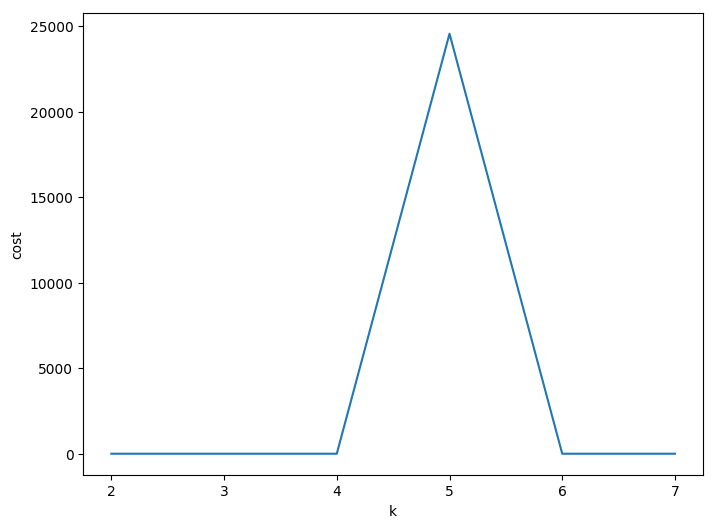

In [0]:
cost = np.zeros(20)
cost[5] = model.computeCost(df_kmean)
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,8),cost[2:8])
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
display()

In [0]:
# Shows the result.
#Printing the centroids
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)
    ctr=[]

Cluster Centers: 
[3.00000000e+01 5.51495017e-02 2.39202658e-01 1.76079734e+00
 3.98671096e-03 1.79401993e-02 1.26843854e+00 1.29568106e-01
 1.26245847e-01 1.72093023e-01 1.32890365e-03 2.59136213e-02
 0.00000000e+00 1.52823920e-02 1.60132890e-01 1.15614618e-01
 1.40199336e-01 1.24916944e-01 1.88704319e-01 1.47508306e-01
 1.45514950e-01 9.16943522e-02 1.14950166e-01 1.86046512e-02
 3.98671096e-03 4.38538206e-02 1.32890365e-03 4.58471761e-02
 1.26245847e-01 2.79069767e-01]
[6.20793269e+01 3.89423077e-01 4.08653846e-02 1.69711538e+00
 2.28365385e-02 2.40384615e-03 1.17908654e+00 2.22355769e-01
 1.70673077e-01 6.49038462e-02 6.00961538e-03 9.61538462e-03
 0.00000000e+00 1.92307692e-02 5.64903846e-02 1.33413462e-01
 1.83894231e-01 1.40625000e-01 2.27163462e-01 1.87500000e-01
 1.86298077e-01 1.20192308e-01 1.02163462e-01 1.80288462e-02
 8.41346154e-03 9.61538462e-02 8.41346154e-03 7.33173077e-02
 1.11778846e-01 3.14903846e-01]
[4.00000000e+01 1.90839695e-01 6.87022901e-02 1.88549618e+00
 3.81679389e-03 3.43511450e-02 1.33587786e+00 1.94656489e-01
 1.79389313e-01 1.03053435e-01 3.81679389e-03 7.63358779e-03
 0.00000000e+00 2.29007634e-02 1.29770992e-01 1.79389313e-01
 1.52671756e-01 1.48854962e-01 2.21374046e-01 1.60305344e-01
 1.98473282e-01 8.01526718e-02 9.16030534e-02 1.52671756e-02
 3.81679389e-03 4.58015267e-02 3.81679389e-03 9.16030534e-02
 1.45038168e-01 2.82442748e-01]
[2.00000000e+01 3.26086957e-02 2.93478261e-01 1.73913043e+00
 0.00000000e+00 1.08695652e-02 1.18478261e+00 1.30434783e-01
 8.69565217e-02 2.50000000e-01 0.00000000e+00 6.52173913e-02
 0.00000000e+00 1.08695652e-02 1.41304348e-01 1.63043478e-01
 1.30434783e-01 9.78260870e-02 2.50000000e-01 1.84782609e-01
 6.52173913e-02 7.60869565e-02 6.52173913e-02 0.00000000e+00
 0.00000000e+00 3.26086957e-02 0.00000000e+00 1.08695652e-02
 8.69565217e-02 2.71739130e-01]
[5.00000000e+01 2.06451613e-01 6.45161290e-02 1.86451613e+00
 1.93548387e-02 6.45161290e-03 1.29032258e+00 2.25806452e-01
 1.87096774e-01 9.67741935e-02 0.00000000e+00 3.22580645e-02
 0.00000000e+00 6.45161290e-03 5.16129032e-02 9.03225806e-02
 1.16129032e-01 1.09677419e-01 2.00000000e-01 2.25806452e-01
 2.45161290e-01 1.03225806e-01 1.29032258e-01 0.00000000e+00
 1.93548387e-02 7.09677419e-02 1.93548387e-02 4.51612903e-02
 1.22580645e-01 2.83870968e-01]

In [0]:
pandasDF=cluster.toPandas()
centers = pd.DataFrame(ctr,columns=x)


In [0]:
display(pandasDF)

Time of the day Day Roadtype SpeedLimit TrunkRoadStatus Pedestrians Total Vehicles Agricultural vehicles Buses_ coaches or minibuses Cars Light vans or goods vehicles Motorcycles Pedal cycles Ridden horses Taxis or private hire vehicles Trams or light rail vehicles Other vehicles Total Casualties Fatal Serious Slight Age Of Casualty 0-15 Age Of Casualty 16-19 Age Of Casualty 20-24 Age Of Casualty 25-29 Age Of Casualty 30-39 Age Of Casualty 40-49 Age Of Casualty 50-59 Age Of Casualty 60-69 Age Of Casualty 70+ Age Of Casualty Unknown Motorcyle Fatal Motorcyle Serious Young Fatal Young Serious Older Drivers Young Drivers TC Binary features prediction night Wednesday Single carriageway 30 1 0 1 0 0 1 0 0 0 0 0 0 0 1.0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 1, 3, 6, 16), List(30.0, 1.0, 1.0, 1.0, 1.0)) 0 night Wednesday One Way Street 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1.0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 2, 3, 6, 15), List(30.0, 1.0, 1.0, 1.0, 1.0)) 0 afternoon Wednesday Single carriageway 30 0 0 3 0 0 3 0 0 0 0 0 0 0 2.0 0 0 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 List(0, 30, List(0, 3, 6, 15, 18, 29), List(30.0, 3.0, 3.0, 1.0, 1.0, 1.0)) 0 night Wednesday Single carriageway 20 0 0 1 0 0 1 0 0 0 0 0 0 0 3.0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 List(0, 30, List(0, 3, 6, 15, 29), List(20.0, 1.0, 1.0, 3.0, 1.0)) 3 afternoon Thursday Single carriageway 30 0 0 3 0 0 3 0 0 0 0 0 0 0 1.0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 List(0, 30, List(0, 3, 6, 16, 29), List(30.0, 3.0, 3.0, 1.0, 2.0)) 0 afternoon Thursday Single carriageway 30 0 0 4 0 0 4 0 0 0 0 0 0 0 2.0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 List(0, 30, List(0, 3, 6, 17, 22, 28), List(30.0, 4.0, 4.0, 1.0, 1.0, 1.0)) 0 afternoon Thursday Roundabout 20 0 0 2 0 0 1 0 0 1 0 0 0 0 1.0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 3, 6, 9, 18), List(20.0, 2.0, 1.0, 1.0, 1.0)) 3 evening Thursday Single carriageway 60 0 0 2 0 0 2 0 0 0 0 0 0 0 1.0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 List(0, 30, List(0, 3, 6, 16, 29), List(60.0, 2.0, 2.0, 1.0, 1.0)) 1 evening Thursday Single carriageway 60 1 0 2 0 0 2 0 0 0 0 0 0 0 4.0 1 3 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 List(0, 30, List(0, 1, 3, 6, 15, 18, 20, 21, 26), List(60.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0)) 1 night Thursday Single carriageway 60 0 0 1 0 0 1 0 0 0 0 0 0 0 1.0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 List(0, 30, List(0, 3, 6, 16, 29), List(60.0, 1.0, 1.0, 1.0, 1.0)) 1 morning Friday Single carriageway 30 0 0 2 0 0 2 0 0 0 0 0 0 0 2.0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 List(0, 30, List(0, 3, 6, 16, 29), List(30.0, 2.0, 2.0, 2.0, 2.0)) 0 morning Friday Single carriageway 30 0 1 1 0 0 0 0 0 1 0 0 0 0 1.0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 2, 3, 9, 21), List(30.0, 1.0, 1.0, 1.0, 1.0)) 0 morning Friday Single carriageway 30 0 0 1 0 0 1 0 0 0 0 0 0 0 1.0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 List(0, 30, List(0, 3, 6, 16, 27, 29), List(30.0, 1.0, 1.0, 1.0, 1.0, 1.0)) 0 afternoon Friday Single carriageway 60 0 0 2 0 0 1 1 0 0 0 0 0 0 1.0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 3, 6, 7, 19), List(60.0, 2.0, 1.0, 1.0, 1.0)) 1 afternoon Friday Single carriageway 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1.0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 2, 3, 6, 19), List(30.0, 1.0, 1.0, 1.0, 1.0)) 0 evening Friday Single carriageway 30 0 1 1 0 0 1 0 0 0 0 0 0 0 1.0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 List(0, 30, List(0, 2, 3, 6, 14, 29), List(30.0, 1.0, 1.0, 1.0, 1.0, 1.0)) 0 evening Friday Single carriageway 60 0 0 2 0 0 2 0 0 0 0 0 0 0 1.0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 List(0, 30, List(0, 3, 6, 18), List(60.0, 2.0, 2.0, 1.0)) 1 evening Friday Single carriageway 30 0 0 2 0 0 2 0 0 0 0 0 0 0 1.0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 List(0, 30, List(0, 3, 6, 15, 29), List(30.0, 2.0, 2.0, 1.0, 1.0)) 0 morning Saturday Single carriageway 30 0 0 2 0 0 1 0 0 1 0 0 0 0 1.0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 